Accuracy: 0.810126582278481
Precision: 0.8258717152337957
Recall: 0.810126582278481


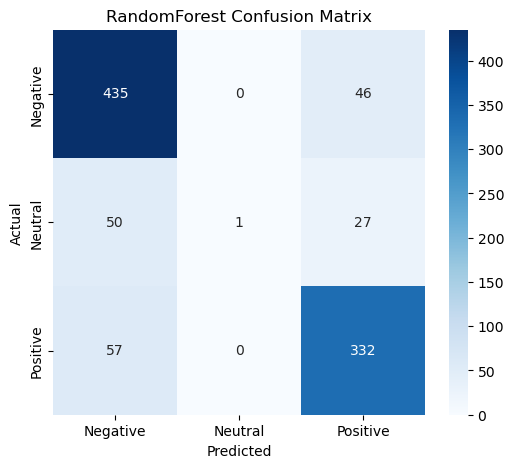

In [ ]:
# Logistic Regression – Sentiment Classification with Graphs

# Step 1: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load dataset
file_path = "../datasets/labeled_data/ethiopian_airlines_overall_sentiment.csv"
df = pd.read_csv(file_path) 


# Step 3: Encode sentiment labels
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['overall_sentiment'])

# Step 4: TF-IDF Vectorization
X = TfidfVectorizer(max_features=500).fit_transform(df['review_comment']).toarray()
y = df['label']

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train Model
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

# Step 7: Predictions & Evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))

# Step 8: Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("RandomForest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
